In [2]:
import torch
import numpy as np
from torch.autograd import Variable

import torch.nn as nn
import matplotlib.pyplot as plt


In [2]:
# There is a very interesting comparison about the effective of grident computation between numpy torch torch-autograd etc:
# http://www.cs.colostate.edu/~anderson/wp/2017/10/13/comparison-of-fitting-a-polynomial-to-data-with-numpy-pytorch-and-autograd-on-cpu-and-gpu/

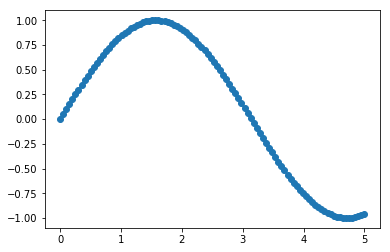

In [6]:
# What will we do now is fitting these points with a curve

X = np.linspace(0, 5, 100).reshape((-1, 1))
Y = np.sin(X)
plt.plot(X, Y, 'o-');

In [9]:
# this model can also build from nn.Module
def poly_fit(x,w):
    D = w.data.shape[0]
    xPowers = x**Variable(torch.arange(0.0, D))
    return xPowers.mm(w)


w = Variable((torch.zeros(5,1)).type(torch.FloatTensor),requires_grad = True)
x = Variable(torch.from_numpy(X).type(torch.FloatTensor),requires_grad = False)
y = Variable(torch.from_numpy(Y).type(torch.FloatTensor),requires_grad = False)


epoches = 200000
lr = 0.00001
mseTrace = torch.zeros(epoches)
for epoch in range(epoches):
    predict = poly_fit(x,w)

    mse = ((y- predict)**2).mean() # my own MSE
    #mse = (torch.abs(y- predict)).mean() # my own MSE
    #mse = -torch.log(torch.abs((y- predict)/y)).sum()
    if epoch >0:
         w.grad.data.zero_()
    mse.backward()
    w.data -= lr*w.grad.data
    # print the training info
    mseTrace[epoch] = mse.data[0]
    
    if (epoch % 1000==0):
        print('Epoch [%d/%d], Loss:%.5f'
             % (epoch, epoches, mse.data[0]))
        

Epoch [0/200000], Loss:0.52650
Epoch [1000/200000], Loss:0.29783
Epoch [2000/200000], Loss:0.28306
Epoch [3000/200000], Loss:0.27407
Epoch [4000/200000], Loss:0.26618
Epoch [5000/200000], Loss:0.25867
Epoch [6000/200000], Loss:0.25139
Epoch [7000/200000], Loss:0.24433
Epoch [8000/200000], Loss:0.23747
Epoch [9000/200000], Loss:0.23082
Epoch [10000/200000], Loss:0.22435
Epoch [11000/200000], Loss:0.21808
Epoch [12000/200000], Loss:0.21199
Epoch [13000/200000], Loss:0.20607
Epoch [14000/200000], Loss:0.20033
Epoch [15000/200000], Loss:0.19475
Epoch [16000/200000], Loss:0.18934
Epoch [17000/200000], Loss:0.18408
Epoch [18000/200000], Loss:0.17898
Epoch [19000/200000], Loss:0.17403
Epoch [20000/200000], Loss:0.16921
Epoch [21000/200000], Loss:0.16454
Epoch [22000/200000], Loss:0.16001
Epoch [23000/200000], Loss:0.15560
Epoch [24000/200000], Loss:0.15133
Epoch [25000/200000], Loss:0.14717
Epoch [26000/200000], Loss:0.14314
Epoch [27000/200000], Loss:0.13923
Epoch [28000/200000], Loss:0.1354

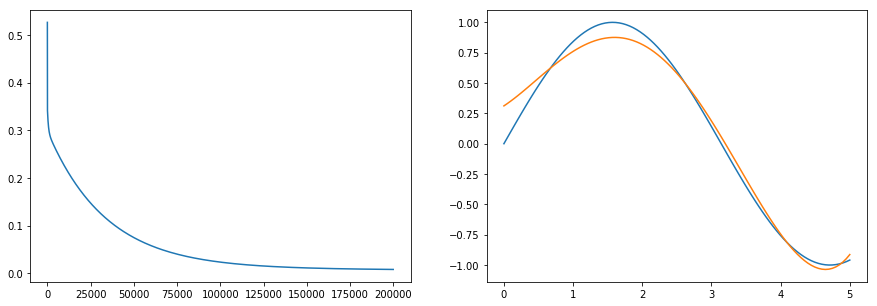

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(mseTrace.numpy())

plt.subplot(1,2,2)
plt.plot(X, Y)
plt.plot(X, predict.data.numpy());

In [8]:
# 2. Let we using a 3 Fully connected network( without active function)
#Model
class PolyNN(nn.Module):
    def __init__(self, input_size=1, n_classes=1):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 5)
        self.linear2 = nn.Linear(5, 5)
        self.linear3 = nn.Linear(5, n_classes)
    
    def forward(self,x):
        out = self.linear1(x)
        out = self.linear2(out)
        out = self.linear3(out)
        return out

    
model = PolyNN()

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)  

mseTrace1 = torch.zeros(epoches)
for epoch in range(epoches):
    
    optimizer.zero_grad()
    predict = model(x)
    loss = criterion(predict, y)
    loss.backward()
    optimizer.step()
    
    
    # print the training info
    mseTrace1[epoch] = loss.data[0]
    
    if (epoch % 1000==0):
        print('Epoch [%d/%d], Loss:%.5f'
             % (epoch, epoches, loss.data[0]))
    
    

NameError: name 'x' is not defined

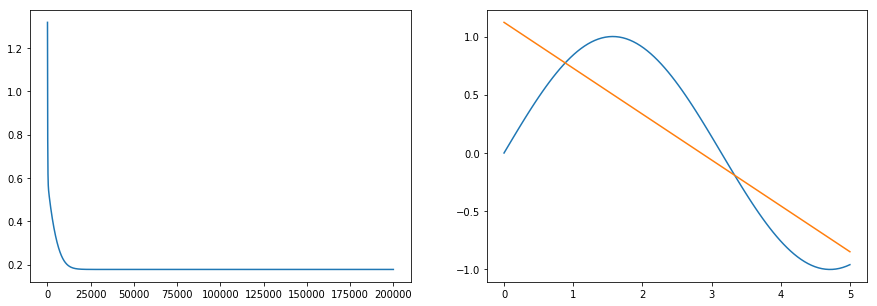

In [77]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(mseTrace1.numpy())

plt.subplot(1,2,2)
plt.plot(X, Y)
plt.plot(X, predict.data.numpy());

In [13]:
# 2. Let we using a 3 Fully connected network

import torch.nn.functional as F

#Model
class PolyNN(nn.Module):
    def __init__(self, input_size=1, n_classes=1):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 5)
        self.linear2 = nn.Linear(5, 5)
        self.linear3 = nn.Linear(5, n_classes)
    
    def forward(self,x):
        out = F.relu(self.linear1(x))
        out = F.relu(self.linear2(out))
        out = self.linear3(out)
        return out

    
model = PolyNN()
epoches = 200000
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  

mseTrace1 = torch.zeros(epoches)
for epoch in range(epoches):
    
    optimizer.zero_grad()
    predict = model(x)
    loss = criterion(predict, y)
    loss.backward()
    optimizer.step()
    
    
    # print the training info
    mseTrace1[epoch] = loss.data[0]
    
    if (epoch % 1000==0):
        print('Epoch [%d/%d], Loss:%.5f'
             % (epoch, epoches, loss.data[0]))
    
    

Epoch [0/200000], Loss:0.56838
Epoch [1000/200000], Loss:0.48954
Epoch [2000/200000], Loss:0.46263
Epoch [3000/200000], Loss:0.40255
Epoch [4000/200000], Loss:0.32949
Epoch [5000/200000], Loss:0.24670
Epoch [6000/200000], Loss:0.18160
Epoch [7000/200000], Loss:0.14299
Epoch [8000/200000], Loss:0.12080
Epoch [9000/200000], Loss:0.10651
Epoch [10000/200000], Loss:0.09590
Epoch [11000/200000], Loss:0.08697
Epoch [12000/200000], Loss:0.07878
Epoch [13000/200000], Loss:0.07099
Epoch [14000/200000], Loss:0.06339
Epoch [15000/200000], Loss:0.05595
Epoch [16000/200000], Loss:0.04869
Epoch [17000/200000], Loss:0.04168
Epoch [18000/200000], Loss:0.03499
Epoch [19000/200000], Loss:0.02875
Epoch [20000/200000], Loss:0.02308
Epoch [21000/200000], Loss:0.01812
Epoch [22000/200000], Loss:0.01390
Epoch [23000/200000], Loss:0.01047
Epoch [24000/200000], Loss:0.00780
Epoch [25000/200000], Loss:0.00578
Epoch [26000/200000], Loss:0.00431
Epoch [27000/200000], Loss:0.00325
Epoch [28000/200000], Loss:0.0025

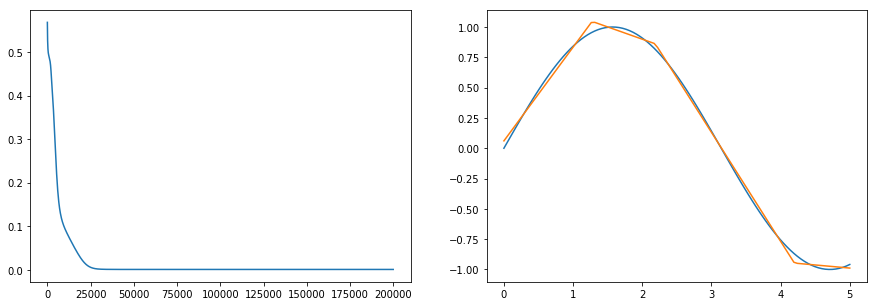

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(mseTrace1.numpy())

plt.subplot(1,2,2)
plt.plot(X, Y)
plt.plot(X, predict.data.numpy());